In [6]:
# Cell 1: Mount Drive & basic imports

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import pandas as pd
import numpy as np
import os


Mounted at /content/drive


In [7]:
# Cell 2: Define paths and load full phiusiil_with_qr_minimal.csv

BASE_DIR = "/content/drive/MyDrive/SafeScan-Project"
DATA_DIR = os.path.join(BASE_DIR, "datasets")

MINIMAL_CSV_PATH = os.path.join(DATA_DIR, "phiusiil_with_qr_minimal.csv")
print("Using CSV:", MINIMAL_CSV_PATH)

df = pd.read_csv(MINIMAL_CSV_PATH)
print("Original shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Using CSV: /content/drive/MyDrive/SafeScan-Project/datasets/phiusiil_with_qr_minimal.csv
Original shape: (235795, 3)
Columns: ['qr_image_path', 'url', 'label']


,qr_image_path,url,label
0,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.southbankmosaics.com,1
1,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.uni-mainz.de,1
2,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.voicefmradio.co.uk,1
3,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.sfnmjournal.com,1
4,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.rewildingargentina.org,1


In [8]:
# Cell 3: Ensure columns are named qr_image_path, url, label

df = df.rename(columns={
    "QrImagePath": "qr_image_path",
    "QRImagePath": "qr_image_path",
    "URL": "url",
    "Url": "url",
    "Label": "label",
    "Result": "label"
})

print("Columns after rename:", df.columns.tolist())
df.head()


Columns after rename: ['qr_image_path', 'url', 'label']


,qr_image_path,url,label
0,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.southbankmosaics.com,1
1,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.uni-mainz.de,1
2,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.voicefmradio.co.uk,1
3,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.sfnmjournal.com,1
4,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.rewildingargentina.org,1


In [9]:
df

,qr_image_path,url,label
0,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.southbankmosaics.com,1
1,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.uni-mainz.de,1
2,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.voicefmradio.co.uk,1
3,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.sfnmjournal.com,1
4,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.rewildingargentina.org,1
...,...,...,...
235790,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.skincareliving.com,1
235791,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.winchester.gov.uk,1
235792,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.nononsensedesign.be,1
235793,/content/drive/MyDrive/SafeScan-Project/datase...,https://patient-cell-40f5.updatedlogmylogin.wo...,0


In [10]:
# Cell 4: Keep only rows whose QR image file actually exists in Drive

QR_DIR_DRIVE = "/content/drive/MyDrive/SafeScan-Project/datasets/phiusiil_qr_images"

# Clean paths: strip spaces
df["qr_image_path"] = df["qr_image_path"].astype(str).str.strip()

# If paths in CSV don't include the full folder, you might need to prepend QR_DIR_DRIVE
# Uncomment and adapt if needed:
# df["qr_image_path"] = df["qr_image_path"].apply(
#     lambda p: os.path.join(QR_DIR_DRIVE, os.path.basename(p))
# )

# Check existence
df["qr_exists"] = df["qr_image_path"].apply(os.path.exists)

print(df["qr_exists"].value_counts())
print("Total rows:", len(df))
print("Rows with existing QR:", df["qr_exists"].sum())
print("Rows with missing QR:", (~df["qr_exists"]).sum())


qr_exists
True     166296
False     69499
Name: count, dtype: int64
Total rows: 235795
Rows with existing QR: 166296
Rows with missing QR: 69499


In [11]:
# Cell 5: Filter to existing QRs, sample up to 50K rows, clean and save as clean_dataset_50k.csv

# Keep only rows where QR image exists
df_valid = df[df["qr_exists"]].drop(columns=["qr_exists"]).reset_index(drop=True)
print("After filtering to existing QR images:", df_valid.shape)

# Basic cleaning
df_valid = df_valid.dropna(subset=["url", "label", "qr_image_path"]).reset_index(drop=True)
df_valid["url"] = df_valid["url"].astype(str).str.strip()
df_valid["qr_image_path"] = df_valid["qr_image_path"].astype(str).str.strip()
df_valid = df_valid[df_valid["url"] != ""].reset_index(drop=True)

df_valid["label"] = df_valid["label"].astype(int)

# Drop duplicate URLs
df_valid = df_valid.drop_duplicates(subset=["url"]).reset_index(drop=True)
print("After cleaning & dedup:", df_valid.shape)

# Sample 50K (or all if fewer)
N = 50000
if len(df_valid) > N:
    df_50k = df_valid.sample(n=N, random_state=42).reset_index(drop=True)
else:
    df_50k = df_valid.copy()

print("Final subset shape (for project):", df_50k.shape)
df_50k.head()


After filtering to existing QR images: (166296, 3)
After cleaning & dedup: (166090, 3)
Final subset shape (for project): (50000, 3)


,qr_image_path,url,label
0,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.getinvolved.qld.gov.au,1
1,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.mywordpublishing.com,1
2,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.grantcunningham.com,1
3,/content/drive/MyDrive/SafeScan-Project/datase...,http://www.f0546574.xsph.ru,0
4,/content/drive/MyDrive/SafeScan-Project/datase...,https://www.billabongsanctuary.com.au,1


In [12]:
# Cell 6: Save the 50K dataset as clean_dataset_50k.csv and also as clean_dataset.csv (for reuse)

CLEAN_50K_PATH = os.path.join(BASE_DIR, "clean_dataset_50k.csv")
CLEAN_PATH     = os.path.join(BASE_DIR, "clean_dataset.csv")  # main file name used by other code

df_50k.to_csv(CLEAN_50K_PATH, index=False)
df_50k.to_csv(CLEAN_PATH, index=False)

print("Saved 50K dataset to:")
print(" -", CLEAN_50K_PATH)
print(" -", CLEAN_PATH)


Saved 50K dataset to:
 - /content/drive/MyDrive/SafeScan-Project/clean_dataset_50k.csv
 - /content/drive/MyDrive/SafeScan-Project/clean_dataset.csv


In [13]:
# Cell 7: Install libraries for URL features + ANN + CNN

!pip install -q tldextract tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 3.3 MB/s eta 0:00:00


In [14]:
# Cell 8: Load the new clean_dataset.csv (50K) for ML

import tldextract
import re, math
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

CLEAN_DATA_CSV = "/content/drive/MyDrive/SafeScan-Project/clean_dataset.csv"
df = pd.read_csv(CLEAN_DATA_CSV)

print("Loaded clean dataset:", df.shape)
print(df.head())


Loaded clean dataset: (50000, 3)
                                       qr_image_path  \
0  /content/drive/MyDrive/SafeScan-Project/datase...   
1  /content/drive/MyDrive/SafeScan-Project/datase...   
2  /content/drive/MyDrive/SafeScan-Project/datase...   
3  /content/drive/MyDrive/SafeScan-Project/datase...   
4  /content/drive/MyDrive/SafeScan-Project/datase...   

                                     url  label  
0     https://www.getinvolved.qld.gov.au      1  
1       https://www.mywordpublishing.com      1  
2        https://www.grantcunningham.com      1  
3            http://www.f0546574.xsph.ru      0  
4  https://www.billabongsanctuary.com.au      1  


In [15]:
# Cell 9: URL feature extraction

URL_COL = "url"
LABEL_COL = "label"

df = df.dropna(subset=[URL_COL, LABEL_COL]).reset_index(drop=True)
df[URL_COL] = df[URL_COL].astype(str).str.strip()
df = df[df[URL_COL] != ""].reset_index(drop=True)

le = LabelEncoder()
df["label_id"] = le.fit_transform(df[LABEL_COL])
y = df["label_id"].values
print("Classes:", le.classes_, "Encoded as:", np.unique(y))

SHORTENERS = [
    "bit.ly", "goo.gl", "t.co", "tinyurl.com", "ow.ly",
    "is.gd", "buff.ly", "cutt.ly", "rebrand.ly"
]
ip_pattern = re.compile(
    r"^(https?://)?(\d{1,3}\.){3}\d{1,3}(/|:|$)",
    re.IGNORECASE
)

def shannon_entropy(s: str) -> float:
    if not s:
        return 0.0
    counts = Counter(s)
    probs = [c / len(s) for c in counts.values()]
    return -sum(p * math.log2(p) for p in probs)

def extract_url_features(url: str) -> dict:
    url = url.strip()
    parts = tldextract.extract(url)
    domain = ""
    if parts.domain:
        domain = parts.domain
        if parts.suffix:
            domain = f"{parts.domain}.{parts.suffix}"

    subdomain = parts.subdomain or ""
    hostname = domain if not subdomain else f"{subdomain}.{domain}"

    features = {}
    rest = url.split("://", 1)[-1]

    features["url_length"]       = len(url)
    features["hostname_length"]  = len(hostname)
    features["path_length"]      = len(rest.split("/", 1)[1]) if "/" in rest else 0
    features["num_dots"]         = url.count(".")
    features["num_hyphens"]      = url.count("-")
    features["num_digits"]       = sum(c.isdigit() for c in url)
    features["num_special_chars"]= sum(1 for c in url if c in "@#?%=&_")
    features["num_subdomains"]   = len(subdomain.split(".")) if subdomain else 0
    features["has_https"]        = 1 if url.lower().startswith("https://") else 0
    features["https_in_domain"]  = 1 if "https" in hostname.lower() else 0
    features["contains_ip"]      = 1 if ip_pattern.match(url) else 0
    features["contains_at"]      = 1 if "@" in url else 0
    features["contains_double_slash"] = 1 if "//" in rest else 0
    features["url_entropy"]      = shannon_entropy(url)
    tokens = re.split(r"[./?=&_-]", rest)
    tokens = [t for t in tokens if t]
    features["url_token_count"]  = len(tokens)
    features["is_shortener"]     = 1 if any(s in hostname.lower() for s in SHORTENERS) else 0

    return features

feature_dicts = df[URL_COL].apply(extract_url_features)
X_full = pd.DataFrame(list(feature_dicts))

print("Feature columns:", X_full.columns.tolist())
print("X_full shape:", X_full.shape)


Classes: [0 1] Encoded as: [0 1]
Feature columns: ['url_length', 'hostname_length', 'path_length', 'num_dots', 'num_hyphens', 'num_digits', 'num_special_chars', 'num_subdomains', 'has_https', 'https_in_domain', 'contains_ip', 'contains_at', 'contains_double_slash', 'url_entropy', 'url_token_count', 'is_shortener']
X_full shape: (50000, 16)


In [16]:
# Cell 10: Train/Val split + scaling

X_train, X_val, y_train, y_val = train_test_split(
    X_full.values,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

print("Train shape:", X_train_scaled.shape, "Val shape:", X_val_scaled.shape)


Train shape: (35000, 16) Val shape: (15000, 16)


In [29]:
# Cell 11: ANN training on URL features

input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

if num_classes == 2:
    loss_fn = "binary_crossentropy"
    output_units = 1
    output_activation = "sigmoid"
else:
    loss_fn = "sparse_categorical_crossentropy"
    output_units = num_classes
    output_activation = "softmax"

ann_model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(output_units, activation=output_activation)
])

ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=["accuracy"]
)

ann_model.summary()

early_stop = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

if num_classes == 2:
    y_val_pred_prob = ann_model.predict(X_val_scaled).ravel()
    y_val_pred = (y_val_pred_prob >= 0.5).astype(int)
else:
    y_val_pred_prob = ann_model.predict(X_val_scaled)
    y_val_pred = np.argmax(y_val_pred_prob, axis=1)

print("\n=== ANN Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred))
print("ANN Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("ANN Exact Accuracy:", accuracy_score(y_val, y_val_pred))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8071 - loss: 0.5247 - val_accuracy: 0.9428 - val_loss: 0.2077
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9415 - loss: 0.2091 - val_accuracy: 0.9521 - val_loss: 0.1447
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9541 - loss: 0.1517 - val_accuracy: 0.9551 - val_loss: 0.1307
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9578 - loss: 0.1401 - val_accuracy: 0.9572 - val_loss: 0.1238
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9612 - loss: 0.1303 - val_accuracy: 0.9601 - val_loss: 0.1185
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1217 - val_accuracy: 0.9607 - val_loss: 0.1148
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9626 - loss: 0.1235 - val_accuracy: 0.9618 - val_loss: 0.1125
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1163 - val_accuracy: 0.

In [30]:
# If you still have the main df in memory (used for ANN)
print("Full dataset used for ANN:")
print("df shape:", df.shape)

# If you used 'label_id' column for training:
print("\nClass distribution in full dataset (label_id):")
print(df["label_id"].value_counts())
print("\nClass distribution (percentage):")
print(df["label_id"].value_counts(normalize=True))


Full dataset used for ANN:
df shape: (50000, 4)

Class distribution in full dataset (label_id):
label_id
1    28776
0    21224
Name: count, dtype: int64

Class distribution (percentage):
label_id
1    0.57552
0    0.42448
Name: proportion, dtype: float64


In [31]:
print("\nTrain / Validation split sizes:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_val_scaled:", X_val_scaled.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)



Train / Validation split sizes:
X_train_scaled: (35000, 16)
X_val_scaled: (15000, 16)
y_train: (35000,)
y_val: (15000,)


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nSum of all entries in confusion matrix:", cm.sum())
print("Length of y_val:", len(y_val))

print("\nExact accuracy from confusion matrix:",
      (cm[0,0] + cm[1,1]) / cm.sum())

print("Exact accuracy from accuracy_score:",
      accuracy_score(y_val, y_val_pred))



Confusion Matrix:
[[6318   49]
 [  11 8622]]

Sum of all entries in confusion matrix: 15000
Length of y_val: 15000

Exact accuracy from confusion matrix: 0.996
Exact accuracy from accuracy_score: 0.996


In [33]:
import numpy as np

print("\nClass distribution in validation set (y_val):")
unique, counts = np.unique(y_val, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")



Class distribution in validation set (y_val):
Class 0: 6367 samples
Class 1: 8633 samples


In [18]:
# Cell 12: Basic models for comparison

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models_basic = {
    "LogisticRegression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "SVM_RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "GaussianNB": GaussianNB()
}

results = []

for name, clf in models_basic.items():
    print(f"\n====================== {name} ======================")
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    results.append((name, acc))

print("\nSummary of validation accuracies:")
for name, acc in results:
    print(f"{name}: {acc:.4f}")



====================== LogisticRegression ======================
Accuracy: 0.9576
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6367
           1       0.94      0.99      0.96      8633

    accuracy                           0.96     15000
   macro avg       0.96      0.95      0.96     15000
weighted avg       0.96      0.96      0.96     15000

[[5812  555]
 [  81 8552]]

====================== RandomForest ======================
Accuracy: 0.9905
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6367
           1       0.99      0.99      0.99      8633

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000

[[6275   92]
 [  50 8583]]

====================== SVM_RBF ======================
Accuracy: 0.9600
              precision    recall  f1-score   support

     

In [20]:
import pandas as pd
import os

CLEAN_DATA_CSV = "/content/drive/MyDrive/SafeScan-Project/clean_dataset.csv"
df_full = pd.read_csv(CLEAN_DATA_CSV)

print("Full clean dataset shape:", df_full.shape)

# Take a balanced-ish sample of 5000 rows
N_CNN = 5000
if len(df_full) > N_CNN:
    df_cnn = df_full.sample(n=N_CNN, random_state=42).reset_index(drop=True)
else:
    df_cnn = df_full.copy()

print("CNN subset shape:", df_cnn.shape)
print(df_cnn["label"].value_counts())


Full clean dataset shape: (50000, 3)
CNN subset shape: (5000, 3)
label
1    2874
0    2126
Name: count, dtype: int64


In [22]:
import os
import shutil
from tqdm import tqdm

# df_cnn contains your sampled 5000 rows
cnn_image_paths = df_cnn["qr_image_path"].tolist()

LOCAL_CNN_DIR = "/content/cnn_images_5k"
os.makedirs(LOCAL_CNN_DIR, exist_ok=True)

print("Copying CNN subset images to fast local disk...")

copied = 0
for src_path in tqdm(cnn_image_paths):
    if os.path.exists(src_path):
        dst_path = os.path.join(LOCAL_CNN_DIR, os.path.basename(src_path))
        if not os.path.exists(dst_path):
            shutil.copy(src_path, dst_path)
        copied += 1

print("Copied:", copied)


Copying CNN subset images to fast local disk...


100%|██████████| 5000/5000 [14:38<00:00,  5.69it/s]

Copied: 5000


In [23]:
# ==============================
# CNN ON QR IMAGES (FAST VERSION)
# ==============================

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# --------------------------------
# 1) PREPARE DATA FROM df_cnn
# --------------------------------
# Assumes df_cnn already exists in memory and has:
#   - 'qr_image_path'  → local paths under /content/...
#   - 'label'          → 0/1 (or multi-class ints)

image_paths = df_cnn["qr_image_path"].astype(str).values
labels      = df_cnn["label"].astype("int32").values

X_train_img, X_val_img, y_train_img, y_val_img = train_test_split(
    image_paths,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=42
)

print("Train images:", len(X_train_img), " | Val images:", len(X_val_img))

# --------------------------------
# 2) TF DATA PIPELINE
# --------------------------------
IMG_HEIGHT = 32
IMG_WIDTH  = 32
BATCH_SIZE = 64

def load_and_preprocess_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=1)           # grayscale
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])  # 32x32
    img = tf.cast(img, tf.float32) / 255.0               # normalize [0,1]
    return img, label

train_ds = tf.data.Dataset.from_tensor_slices((X_train_img, y_train_img))
val_ds   = tf.data.Dataset.from_tensor_slices((X_val_img, y_val_img))

train_ds = (
    train_ds
    .shuffle(1024)
    .map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# --------------------------------
# 3) DEFINE SMALL CNN
# --------------------------------
num_classes_img = len(np.unique(labels))

if num_classes_img == 2:
    cnn_loss = "binary_crossentropy"
    cnn_output_units = 1
    cnn_output_activation = "sigmoid"
else:
    cnn_loss = "sparse_categorical_crossentropy"
    cnn_output_units = num_classes_img
    cnn_output_activation = "softmax"

cnn_model = models.Sequential([
    layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(cnn_output_units, activation=cnn_output_activation),
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=cnn_loss,
    metrics=["accuracy"],
)

cnn_model.summary()

# --------------------------------
# 4) TRAIN CNN
# --------------------------------
EPOCHS_CNN = 5  # you can reduce to 3 if still slow

cnn_history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_CNN,
    verbose=1,
)

# --------------------------------
# 5) EVALUATE CNN
# --------------------------------
y_val_true = []
y_val_pred = []

for batch_imgs, batch_labels in val_ds:
    preds = cnn_model.predict(batch_imgs, verbose=0)
    if num_classes_img == 2:
        preds_cls = (preds.ravel() >= 0.5).astype(int)
    else:
        preds_cls = np.argmax(preds, axis=1)
    y_val_true.extend(batch_labels.numpy())
    y_val_pred.extend(preds_cls)

y_val_true = np.array(y_val_true)
y_val_pred = np.array(y_val_pred)

print("\n=== CNN Classification Report (Validation) ===")
print(classification_report(y_val_true, y_val_pred))
print("CNN Confusion Matrix:")
print(confusion_matrix(y_val_true, y_val_pred))
print("CNN Exact Accuracy:", accuracy_score(y_val_true, y_val_pred))

Train images: 4000  | Val images: 1000


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,001 (531.25 KB)

 Trainable params: 136,001 (531.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 378ms/step - accuracy: 0.6021 - loss: 0.6715 - val_accuracy: 0.7370 - val_loss: 0.5476
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 391ms/step - accuracy: 0.7344 - loss: 0.5349 - val_accuracy: 0.8610 - val_loss: 0.3847
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.8747 - loss: 0.3545 - val_accuracy: 0.9520 - val_loss: 0.2166
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.9526 - loss: 0.1981 - val_accuracy: 0.9520 - val_loss: 0.1500
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 382ms/step - accuracy: 0.9761 - loss: 0.1253 - val_accuracy: 0.9750 - val_loss: 0.0980

=== CNN Classification Report (Validation) ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       425
           1       0.96      1.00      0.98       575

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0

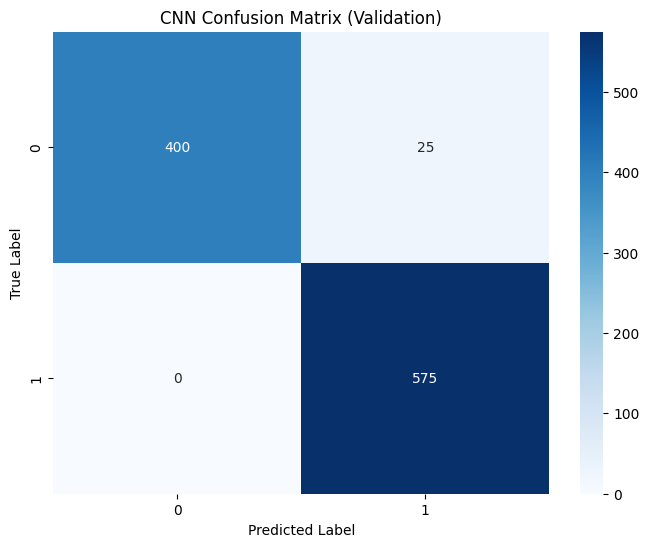

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix for CNN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val_true, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title('CNN Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

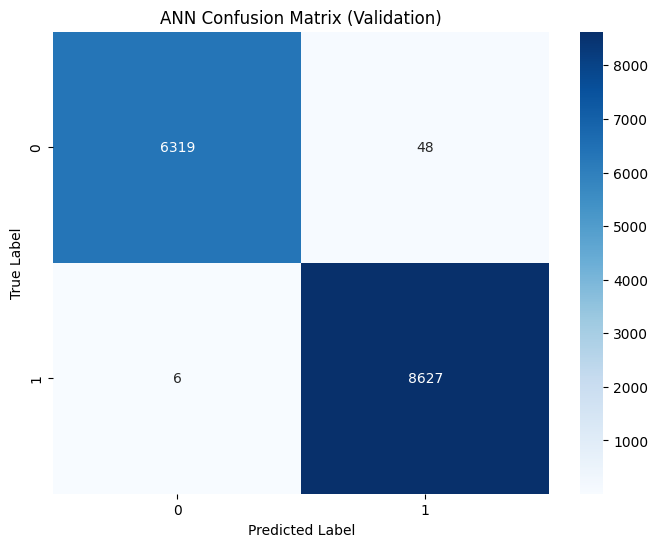

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix for ANN
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred_ann), annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

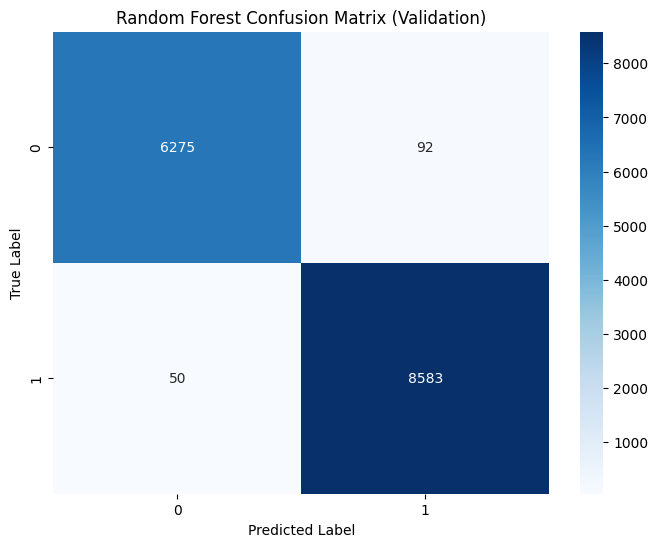

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming RandomForest was the best performing traditional model as per previous output
# Re-train RandomForest to get predictions for plotting if not already stored
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_val_scaled)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
# Save ANN model
ann_model_path = "/content/drive/MyDrive/SafeScan-Project/models/ann_url_model.h5"
ann_model.save(ann_model_path)
print("ANN model saved at:", ann_model_path)


ANN model saved at: /content/drive/MyDrive/SafeScan-Project/models/ann_url_model.h5


In [35]:
import pickle
import os

scaler_path = "/content/drive/MyDrive/SafeScan-Project/models/url_scaler.pkl"

with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved at:", scaler_path)


Scaler saved at: /content/drive/MyDrive/SafeScan-Project/models/url_scaler.pkl


In [36]:
le_path = "/content/drive/MyDrive/SafeScan-Project/models/label_encoder.pkl"

with open(le_path, "wb") as f:
    pickle.dump(le, f)

print("Label Encoder saved at:", le_path)


Label Encoder saved at: /content/drive/MyDrive/SafeScan-Project/models/label_encoder.pkl


In [37]:
!ls -lh "/content/drive/MyDrive/SafeScan-Project/models"


total 47K
-rw------- 1 root root 46K Nov 23 17:52 ann_url_model.h5
-rw------- 1 root root 258 Nov 23 17:52 label_encoder.pkl
-rw------- 1 root root 834 Nov 23 17:52 url_scaler.pkl
